In [1]:
# Reference: https://machinelearningmastery.com/time-series-trends-in-python/

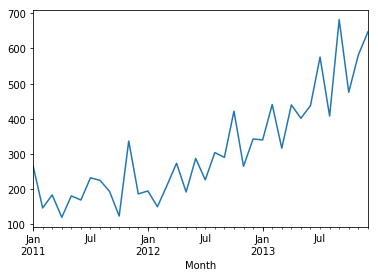

In [2]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
%matplotlib inline

def parser(x):
    return datetime.strptime('201'+x, '%Y-%m')

series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', 
                  header=0, 
                  parse_dates=[0], 
                  index_col=0, 
                  squeeze=True, 
                  date_parser=parser)
series.plot()
pyplot.show()

In [3]:
original_df = read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv")

In [4]:
original_df.head(10)

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [5]:
series

Month
2011-01-01    266.0
2011-02-01    145.9
2011-03-01    183.1
2011-04-01    119.3
2011-05-01    180.3
2011-06-01    168.5
2011-07-01    231.8
2011-08-01    224.5
2011-09-01    192.8
2011-10-01    122.9
2011-11-01    336.5
2011-12-01    185.9
2012-01-01    194.3
2012-02-01    149.5
2012-03-01    210.1
2012-04-01    273.3
2012-05-01    191.4
2012-06-01    287.0
2012-07-01    226.0
2012-08-01    303.6
2012-09-01    289.9
2012-10-01    421.6
2012-11-01    264.5
2012-12-01    342.3
2013-01-01    339.7
2013-02-01    440.4
2013-03-01    315.9
2013-04-01    439.3
2013-05-01    401.3
2013-06-01    437.4
2013-07-01    575.5
2013-08-01    407.6
2013-09-01    682.0
2013-10-01    475.3
2013-11-01    581.3
2013-12-01    646.9
Name: Sales, dtype: float64

In [6]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('201'+x, '%Y-%m')

series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', 
                  header=0, 
                  parse_dates=[0], 
                  index_col=0, 
                  squeeze=True, 
                  date_parser=parser)

In [7]:
X = series.values

In [9]:
X

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9,
       439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9])

1. Method 1 For Detrending

In [10]:
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)
diff

[-120.1,
 37.19999999999999,
 -63.8,
 61.000000000000014,
 -11.800000000000011,
 63.30000000000001,
 -7.300000000000011,
 -31.69999999999999,
 -69.9,
 213.6,
 -150.6,
 8.400000000000006,
 -44.80000000000001,
 60.599999999999994,
 63.20000000000002,
 -81.9,
 95.6,
 -61.0,
 77.60000000000002,
 -13.700000000000045,
 131.70000000000005,
 -157.10000000000002,
 77.80000000000001,
 -2.6000000000000227,
 100.69999999999999,
 -124.5,
 123.40000000000003,
 -38.0,
 36.099999999999966,
 138.10000000000002,
 -167.89999999999998,
 274.4,
 -206.7,
 105.99999999999994,
 65.60000000000002]

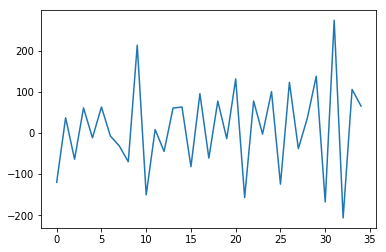

In [11]:
pyplot.plot(diff)
pyplot.show()

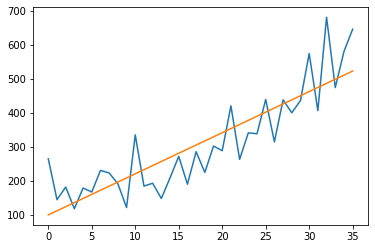

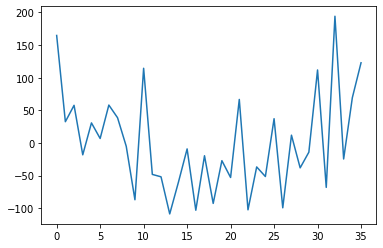

In [21]:
from pandas import read_csv
from pandas import datetime
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy

def parser(x):
    return datetime.strptime('201'+x, '%Y-%m')

series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', 
                  header=0, 
                  parse_dates=[0], 
                  index_col=0, 
                  squeeze=True, 
                  date_parser=parser)
# fit linear model
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
pyplot.plot(detrended)
pyplot.show()